In [1]:
from IPython.display import clear_output

%run 'processing.ipynb'
clear_output()

<h1 style="text-align: center">Dimensionality Reduction for Brainscan Identification and Change Vector Analysis</h1>

<h3 style="text-align: center; color: #555">Eric Miller & Jamie Cho</h3>

# Abstract

We apply dimensionality reduction methods through clustering in order to isolate salient patterns from changes in neural connectivity of 25 subjects who had participated in the IEEE Brain Data Bank Challenge, and compare its efficacy in statistical analysis; afterwards, we evaluate the directionality across subjects and brain regions to investigate whether or not there exist meaningful trends in how the subjects have changed over the course of training. Based on our findings, we conclude that significant continuity exists between pre- and post-intervention scans of the same subject, which persists after the application of several dimensionality reduction schemes. Additionally, we find signficant preliminary evidence for the existence of consistent directionality in the changes between pre- and post-intervention scans.

# Introduction

The IEEE Brain Data Bank Challenge contains neuroimaging and behavioral test data for 25 subjects undergoing a control set of brain training tasks. We analyzed this data to inspect similarities and differences between subjects’ pre-intervention and post-intervention neurological connectomes, as determined from the preprocessed neuroimaging data provided along with the study. For our analysis, we used the Resting State Functional Connectivity (RSFC) and Diffusion Tensor Imaging (DTI) matrices collected before and after the intervention, but we make no statistical attempt to determine whether differences we detect are caused by the intervention itself, potential experimental irregularities, or merely the passage of time.

Using this data, we investigate two questions about the changes that the subjects underwent. First, we characterize the extent to which subjects after the intervention resemble their prior selves before the intervention. We perform this analysis for several different projection functions, and the results indicate the extent to which each projection function retains static information pertaining to the subject’s identity and rejects information pertaining to the time- and session-variable properties of the subject.

Secondly, we investigate the existence of directionality in the changes that subjects do undergo with time, again using the same set of projection functions. The existence of a consistent directionality between each subject’s pre- and post-intervention scans indicates that the observed changes are due to the passage of time or the intervention itself, rather than random measurement noise. We also investigate whether this consistent directionality can be exploited by a Support Vector Machine (SVM) classifier to reliably distinguish which of two scans of the same subject was taken after the intervention. 


# Methods

# Methods

## Preprocessing

### Training/Testing split

One concern when using statistical analysis techniques, especially machine learning techniques like the SVM discussed in Section 9.9.9.9, is obtaining falsely convincing results due to overfitting when training a model on the same data used to evaluate its effectiveness [1]. To combat the problem of both algorithmic overfitting and human overfitting, we elected to remove 20% of the available data (subjects 21-25) as a test set before performing later analysis steps. Unless explicitly mentioned, the following analysis steps were performed on only data from subjects 1-20, with subjects 21-25 only being used for evaluation of performance metrics.

### Handling NaN’s

Subjects 1, 15, and 17, either the pre-intervention or the post-intervention RSFC data is missing for one or more of the 178 regions identified in the RSFC data. Between those three subjects, missing data impacts four different brain regions (13, 76, 126, and 272), manifesting as rows and columns of NaN measurements in the RSFC correlation matrices. If not addressed, this missing data would transitively affect all dimensionality reduction processes operating on those three subjects, as well as any aggregate statistics created including one or more of those subjects.

To address this concern, we considered several basic approaches. In a situation with a large number of subjects and a small fraction missing data, simply ignoring all of the data from the affected subjects is a reasonable approach. In our case, because 15% of all subjects in the training set were affected, while only 4/178=2.2% of brain regions were affected, we selected to instead completely remove the four affected regions from all subjects’ data, as part of the data preprocessing pipeline. This same set of removed regions also needed to be accounted for when processing the region metadata, including the coordinates used for Yeo cluster assignment, as further explored in Section 9.9.9.9. Future work could include using either hole-tolerant dimensionality reduction techniques or data generation techniques to avoid the need to discard useful data, which will become particularly important if these same analysis techniques are applied to a larger dataset.

## Dimensionality Reduction

In order to convert the matrix representation of RSFC and DT connections into a feature vector for processing, we use and compare several different methods of dimensionality reduction. We created a variant of both the Null Reduction and Hierarchical Clustering methods for analyzing both the RSFC and DT connectomes, while the Yeo Parcellation method was only applied to the RSFC data. Table 1 shows the dimensionality of the vector space into which each method projected subject data.

### Null Flattening Reduction

The simplest method for converting a matrix representation of correlation data into a single-dimensional vector is to simply flatten it. While this does not yield high performance, due to the high dimensionality of the vector space into which it projects the data, we use it as a baseline to which we can compare other dimensionality reduction methods.

### Hierarchical Clustering

In order to cluster regions that share similar activations, we apply hierarchical clustering based on the inter-regional connectivity, and reproject the contributions into a smaller-dimensional connectivity space composed of intra- and inter-cluster correlations. The distance metric here is determined by Pearson’s distance conversion from correlation values.

### Clustering based on Yeo[2]

We also evaluate an alternative clustering based on nearest-neighbor matching of regions to Yeo-7 Parcellation in Talairach coordinates, where each member region would contribute equally to final cluster-connectivity representations.


|Clustering Method||RSFC|DT|
|-----||-----|----|
|Null Reduction||75076|6724|
|Hierarchical Clustering||49|49|
|Yeo Parcellation||49|-|

**Table 1**: Dimensionality of target vector space for each dimensionality reduction algorithm



## Similarity Analysis

Using each of the five dimensionality reduction approaches defined above, we projected each subject’s pre- and post-intervention scans into the corresponding vector space, then used euclidean distance measurements to qualitatively understand how similar each subject’s post-intervention scan was to their pre-intervention scan. In order to visually represent these results, we created matrix displays showing the normalized euclidean distance from each projected Post- scan to each projected pre-intervention scan, on which a consistent string of low distances along the primary diagonal (dark blue) indicates that each subject’s post-intervention scan is very close to their own pre-intervention scan in the vector space created by the given projection.

We analyzed the statistical significance of this effect by performing a one-tailed T-test on the hypothesis that an individual subject’s post-intervention scan is closer to their pre-intervention scan than would be expected by random chance. 

## Directionality Analysis

### Predictive Analysis

Based on observed trends in the directionality between pre- and post-intervention data, we attempt a projection of pre-intervention data with computed predictions and evaluate the similarity of the resultant data with the label.

### Region-Wise Directionality

In the second case, we treat the change in the connectivity matrix as a collection of independent distributions across subjects, and observe trends in the change in intercluster connectivity to see whether there exist significant deviation of specific connections from the rest by applying ANOVA.

### Difference Classification

We attempt to exploit the directionality of these reduced-dimensionality projections to identify, for a given pair of brainscans from the same person, which of the pair was acquired before the intervention. To do this, we first compute a pair of difference vectors in projected space (Pre - Post) and (Post - Pre). We then train a SVM using a non-euclidean kernel using these labeled pairs, a technique we refer to as Brainscan Reduction And Acquisition-time Attribution In Non-euclidean Space (BRAAAINS). We then evaluate this trained classifier on novel data from the testing set isolated during the pre-processing phase.


# Results and Analysis

## Dimensionality reducers

In order to prevent overfitting due to the large data-size compared to number of samples, we perform dimensionality reduction on our data.

We have 5 types of reducers:

- Null-RS Reducer
  * A simple passthrough reduction on RSFC, where all information is preserved as-is
- Yeo-RS Reducer
  * Reduction based on Yeo 7-Region Parcellation on RSFC
- Hierarchical Clustering RS Reducer
  * Reduction based on Hierarchical Clustering on RSFC of 20 Training Subjects
- Null FS Reducer
  * A simple passthrough reduction on DTI Connectivity, where all information is preserved as-is
- Hierarchical Clustering FS Reducer
  * Reduction based on Hierarchical Clustering on DTI Connectivity of 20 Training Subjects

### Hierarchical Clustering

First, in order to assess whether or not there exist opportunities for further clustering the brain regions, we evaluate the dendrogram on the correlation matrix and reorganize the clusters to highlight co-firing regions in the resting state connectivity.

Data Visualization


/usr/local/lib/python2.7/dist-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


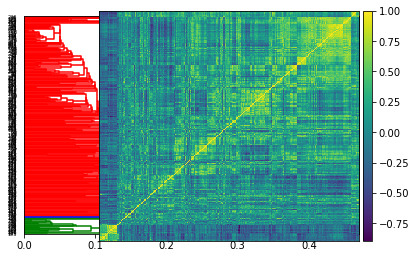

In [2]:
main.data_vis()

Based on the qualitative appearance of the data, we identify that there are clusters, of variable size, present in our data structure. We may also visualize the locations of the these clusters in spatial coordinates:

Cluster Visualization


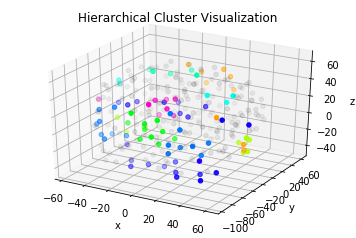

In [3]:
main.cluster_vis(yeo=False)

### Yeo Parcellation

In addition to the hierarchically clustered model, we also evaluate the efficacy of clustering based on the 7-region parcellation by Yeo et al. based on nearest-neighbor matching of the regions in Talairach space.

Cluster Visualization


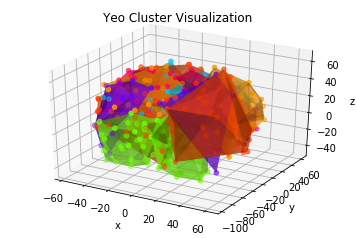

In [4]:
main.cluster_vis()

# Similarity Matrices

We evaluate how "similar" subjects are, pre- to post- intervention, using euclidean distance between the projected vectors. Each figure below shows the normalized distance between each post-intervention scan on the vertical axis and each pre-intervention scan on the horizontal axis. Diagonal entries represent the similiarity of a given subject's post-intervention scan to their own pre-intervention scan.

Overall, we see clear diagonal trends in many of the matrices, which indicate evidence of autocorrelation. Note that the matrices themselves represent euclidean distance of vectorized representations of connectivity, so *lower* values represent *higher* similarities.

### Null Flattening reduction

T-Test (p) 3.33653540337e-55
Effect Size (d) 1.8904061231


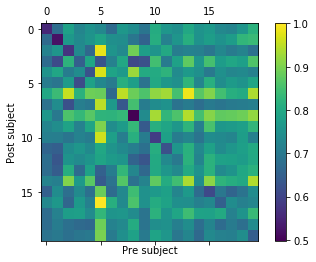

In [5]:
plotSimilarityMatrix(subjects, nullRSreducer); # RSFC data
significance_test(subjects, nullRSreducer);

T-Test (p) 2.40410170106e-47
Effect Size (d) 1.60086103431


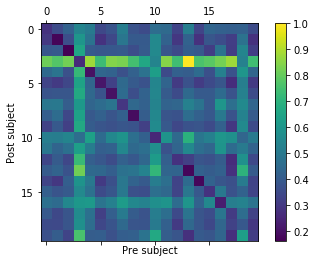

In [6]:
plotSimilarityMatrix(subjects, nullFSreducer); # Diffusion Tensor data
significance_test(subjects, nullFSreducer);

Visually, both the RSFC data and Diffusion tensor show dark primary diagonals, indicating that there is a consistency between each scan of the same subject.

### Correlation Clustering reduction

T-Test (p) 1.01457228425e-10
Effect Size (d) 0.526523078683


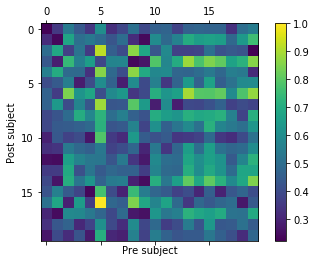

In [7]:
plotSimilarityMatrix(subjects, clusteringRSreducer); # RSFC data
significance_test(subjects, clusteringRSreducer);

T-Test (p) 2.11941171632e-10
Effect Size (d) 0.516412207373


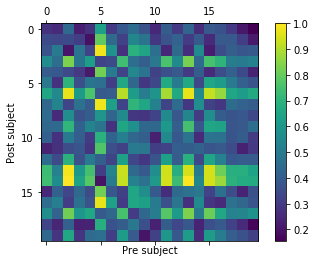

In [8]:
plotSimilarityMatrix(subjects, clusteringFSreducer); # Diffusion Tensor data
significance_test(subjects, clusteringFSreducer);

The correlation clustering process decreases the amount of apparent autocorrelation in the data, indicating that it filters out some of the components of the scan data that contribute to a subject's "identity", instead amplifying differences. Note that, even though the effect is no longer visually obvious, T-tests still indicate $(p<0.05)$ that the distance to the subject's own pre-intervention scan is smaller than would be expected by random chance.

### Yeo Clustering reduction

T-Test (p) 2.73072259221e-16
Effect Size (d) 0.693838944217


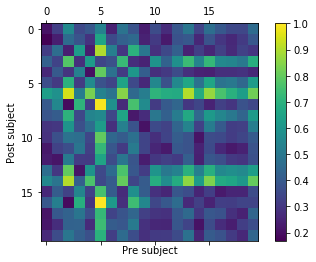

In [9]:
plotSimilarityMatrix(subjects, yeoRSreducer); # RSFC data
significance_test(subjects, yeoRSreducer);

Yeo clusters produce a similar, if slightly less dramatic, effect as Correlation Clustering.

# Directionality modelling

In our directionality analysis, we quantify observable intra- and inter-subject trends in order to answer our two questions: how much of subject identity, as explained by RSFC, is retained and whether or not subjects demonstrate predictable change in brain regions connectivity.

## Regional Directionality

In order to observe whether or not there exist consistent trends in how regional connectivity change pre- to post-training, we plot the effect size of pre- and post- Resting-State Functional Connectivity data, as well as evaluate ANOVA on the distribution of change in regional connectivity on the respective reduction methods:

F_onewayResult(statistic=array([ 1.10217346]), pvalue=array([  7.05799492e-78]))


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in divide


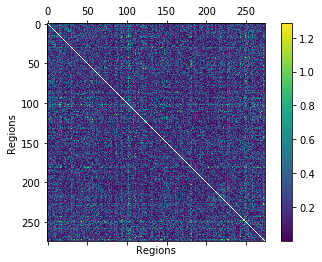

In [10]:
plotRegionalChange(subjects, nullRSreducer);

F_onewayResult(statistic=array([ 0.95348508]), pvalue=array([ 0.56458065]))


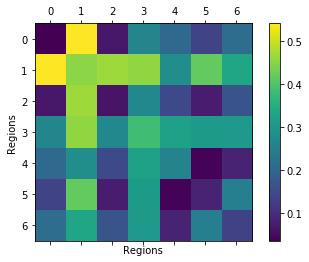

In [11]:
plotRegionalChange(subjects, yeoRSreducer);

F_onewayResult(statistic=array([ 0.63377782]), pvalue=array([ 0.97568049]))


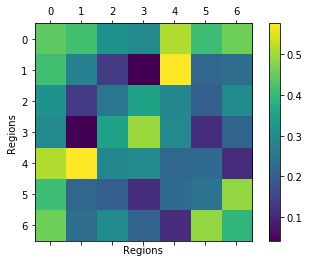

In [12]:
plotRegionalChange(subjects, clusteringRSreducer);

The resultant plot validates our motivation behind dimensionality reduction: that with 77284-dimensional data and 20 samples, we are bound to observe a large directionality in at least one of the datasets. The small p-value from our ANOVA test, with the null hypothesis that the regional changes are drawn from the same distribution, validates this result.

On the other hand, the effect-sizes, of medium range(~0.5) obtained from the clustering analysis is relatively more credible, and demonstrates consistent trends in specific regional connectivities.

## SVM-based Directionality Prediction

Whereas we have observed large p-values in the previous ANOVA test, we seek to validate the results on basis of whether or not we can classify pre-to-post directionality data with an SVM classifier. Success here is defined as correctly predicting the directionality of a pair of scans taken from the testing set withheld during preprocessing.

In [13]:
res, classifier = trainSvm(subjects, clusteringRSreducer)

Success rate: 6 / 10


In [14]:
res, classifier = trainSvm(subjects, yeoRSreducer)

Success rate: 0 / 10


In [15]:
res, classifier = trainSvm(subjects, nullRSreducer)

Success rate: 4 / 10


Contrary to the result of the ANOVA above, this performance indicates that, for all three reduction schemes, the SVM performs at or below random performance. This implies that, if the directionality does in fact exist, it is *not* being effectively exploited by the SVM.

# Conclusions

Our analysis of brainscan data from the IEEE Brain Data Bank dataset reveals that there is statistically significant continuity between pre-intervention and post-intervention scans of the same person, and this continuity persists when the data is initially preprocessed either with correlation clustering or using the brain region parcellations defined by Yeo 2007. In doing so, we rejected the null hypothesis that pre- and post-intervention scans of the same subject are uncorrelated.

Additionally, we demonstrate preliminary results that the changes in brains between the initial and final scans have defined directionality associated with them, although we were unable to exploit these differences to classify scans accurately. Accordingly, we recommend caution regarding this result, as the statistical significance $(p=0.025)$ is near the boundary of significance, and the failure to exploit it with an SVM raises doubts about the utility of the result.

Future work applying similar methods to larger datasets may be able to use more sophisticated dimensionality reduction and machine learning processes, building on the work we present here to attribute the changes we detected to specific mechanisms.

# References

1. Pereira F, Mitchell T, Botvinick M. Machine learning classifiers and fMRI: a tutorial overview. NeuroImage. 2009;45(1 Suppl):S199-S209. doi:10.1016/j.neuroimage.2008.11.007.
2. Yeo BT, Krienen FM, Sepulcre J, Sabuncu MR, Lashkari D, Hollinshead M, Roffman JL, Smoller JW, Zollei L., Polimeni JR, Fischl B, Liu H, Buckner RL. The organization of the human cerebral cortex estimated by intrinsic functional connectivity. J Neurophysiol 106(3):1125-65, 2011.